In [283]:
import pandas as pd
from datetime import datetime
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud, STOPWORDS

In [238]:
df = pd.read_csv('E:/Practice for potfolio/Netflix Data.xls')

In [239]:
df.release_year.unique

<bound method Series.unique of 0       2020
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2007
8803    2018
8804    2009
8805    2006
8806    2015
Name: release_year, Length: 8807, dtype: int64>

In [240]:
df[(df['release_year'] == 2020) & (df['type'] == 'Movie')].count()

show_id         517
type            517
title           517
director        495
cast            470
country         461
date_added      517
release_year    517
rating          517
duration        517
listed_in       517
description     517
dtype: int64

In [241]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [242]:
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [243]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [244]:
df = df.dropna()

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [246]:
year_2020_movies = df[(df['release_year'] == 2020) & (df['type'] == 'Movie')]
year_2020_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
84,s85,Movie,Omo Ghetto: the Saga,"JJC Skillz, Funke Akindele","Funke Akindele, Ayo Makun, Chioma Chukwuka Akp...",Nigeria,"September 10, 2021",2020,TV-MA,147 min,"Action & Adventure, Comedies, Dramas",Twins are reunited as a good-hearted female ga...
126,s127,Movie,Shikara,Vidhu Vinod Chopra,"Aadil Khan, Sadia Khateeb, Zain Khan Durrani, ...",India,"September 2, 2021",2020,TV-14,115 min,"Dramas, International Movies, Romantic Movies",A couple must strive to remain resilient after...
227,s228,Movie,Really Love,Angel Kristi Williams,"Kofi Siriboe, Yootha Wong-Loi-Sing, Michael Ea...",United States,"August 25, 2021",2020,TV-MA,95 min,"Dramas, Independent Movies, Romantic Movies",A rising Black painter tries to break into a c...
229,s230,Movie,The Old Ways,Christopher Alender,"Brigitte Kali Canales, Andrea Cortes, Julia Ve...",United States,"August 25, 2021",2020,TV-MA,90 min,Horror Movies,A reporter visits her birthplace in Veracruz f...
282,s283,Movie,La diosa del asfalto,Julián Hernández,"Ximena Romo, Mabel Cadena, Alejandra Herrera, ...",Mexico,"August 11, 2021",2020,TV-MA,127 min,"Dramas, Independent Movies, International Movies",A woman from a tough neighborhood outside Mexi...
...,...,...,...,...,...,...,...,...,...,...,...,...
3044,s3045,Movie,"Live Twice, Love Once",Maria Ripoll,"Oscar Martínez, Inma Cuesta, Mafalda Carbonell...",Spain,"January 7, 2020",2020,TV-MA,102 min,"Comedies, Dramas, International Movies",When Emilio (Oscar Martínez) is diagnosed with...
3046,s3047,Movie,All the Freckles in the World,Yibrán Asuad,"Hánssel Casillas, Loreto Peralta, Andrea Sutto...",Mexico,"January 3, 2020",2020,TV-14,90 min,"Comedies, International Movies, Romantic Movies",Thirteen-year-old José Miguel is immune to 199...
3060,s3061,Movie,Ghost Stories,"Anurag Kashyap, Dibakar Banerjee, Karan Johar,...","Janhvi Kapoor, Sobhita Dhulipala, Sukant Goel,...",India,"January 1, 2020",2020,TV-MA,145 min,"Horror Movies, International Movies, Thrillers","The directors of Emmy-nominated ""Lust Stories""..."
7594,s7595,Movie,Norm of the North: Family Vacation,Anthony Bell,"Andrew Toth, Lisa Durupt, Jonathan Holmes, Pau...",United States,"May 25, 2020",2020,TV-Y7,89 min,Children & Family Movies,"Stressed by his duties as king and father, Nor..."


In [247]:
df[df.director == 'Christopher Nolan']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
340,s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","August 1, 2021",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...


In [248]:
df[df['listed_in'] == 'Documentaries'][['title', 'listed_in']]


,title,listed_in
304,Lady Boss: The Jackie Collins Story,Documentaries
716,FTA,Documentaries
722,Sir! No Sir!,Documentaries
757,Breaking Boundaries: The Science Of Our Planet,Documentaries
790,Dream/Killer,Documentaries
...,...,...
8565,The World's Most Wanted Animal,Documentaries
8570,Theater of Life,Documentaries
8677,Vikings Unearthed,Documentaries
8692,Walk with Me,Documentaries


In [249]:
date_format = "%B %d, %Y"
df['date_added'] = pd.to_datetime(df['date_added'], format = date_format)
df['year_added'] = df['date_added'].dt.year

In [250]:
TV_shows_added= df[df['type'] == 'TV Show'].groupby(['year_added'])
Movies_added = df[df['type'] == 'Movie'].groupby(['year_added'])
Movies_added.count()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
year_added,,,,,,,,,,,,
2008,1,1,1,1,1,1,1,1,1,1,1,1
2009,2,2,2,2,2,2,2,2,2,2,2,2
2010,1,1,1,1,1,1,1,1,1,1,1,1
2011,13,13,13,13,13,13,13,13,13,13,13,13
2012,3,3,3,3,3,3,3,3,3,3,3,3
2013,6,6,6,6,6,6,6,6,6,6,6,6
2014,14,14,14,14,14,14,14,14,14,14,14,14
2015,47,47,47,47,47,47,47,47,47,47,47,47
2016,195,195,195,195,195,195,195,195,195,195,195,195


In [251]:
TV_shows_added.count()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
year_added,,,,,,,,,,,,
2013,1,1,1,1,1,1,1,1,1,1,1,1
2015,3,3,3,3,3,3,3,3,3,3,3,3
2016,7,7,7,7,7,7,7,7,7,7,7,7
2017,22,22,22,22,22,22,22,22,22,22,22,22
2018,16,16,16,16,16,16,16,16,16,16,16,16
2019,29,29,29,29,29,29,29,29,29,29,29,29
2020,43,43,43,43,43,43,43,43,43,43,43,43
2021,26,26,26,26,26,26,26,26,26,26,26,26


In [252]:
df.groupby(['country']).count()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,year_added
country,,,,,,,,,,,,
", France, Algeria",1,1,1,1,1,1,1,1,1,1,1,1
Argentina,35,35,35,35,35,35,35,35,35,35,35,35
"Argentina, Brazil, France, Poland, Germany, Denmark",1,1,1,1,1,1,1,1,1,1,1,1
"Argentina, Chile",2,2,2,2,2,2,2,2,2,2,2,2
"Argentina, Chile, Peru",1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
"Uruguay, Guatemala",1,1,1,1,1,1,1,1,1,1,1,1
"Uruguay, Spain, Mexico",1,1,1,1,1,1,1,1,1,1,1,1
Venezuela,1,1,1,1,1,1,1,1,1,1,1,1


In [253]:
df.director.value_counts().head(10)

director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Name: count, dtype: int64

In [254]:
actors  = df.explode('cast')
unique_actors = actors['cast'].nunique()
unique_actors

5200

In [255]:
from collections import Counter
Counter(" ".join(df['description']).split( )).most_common(10)

[('a', 6967),
 ('the', 4301),
 ('to', 4150),
 ('and', 3345),
 ('of', 2988),
 ('his', 2469),
 ('in', 2238),
 ('her', 1378),
 ('with', 1353),
 ('an', 1176)]

In [256]:
word_count = df['description'].apply(lambda x: x.split().count('love')).sum()
word_count

228

,title
release_year,
2020,33
2019,24
2017,17
2018,16
2021,15
2016,10
2015,9
2014,8
2012,4


In [63]:
Movie_shows = df[df['type'] == 'Movie'][['title', 'release_year']].groupby(['release_year']).count()
Top_Movies_shows = Movie_shows.nlargest(10, ['title'])

In [64]:
Top_Movies_shows

,title
release_year,
2017,640
2018,632
2016,567
2019,495
2020,409
2015,340
2014,234
2013,195
2012,159


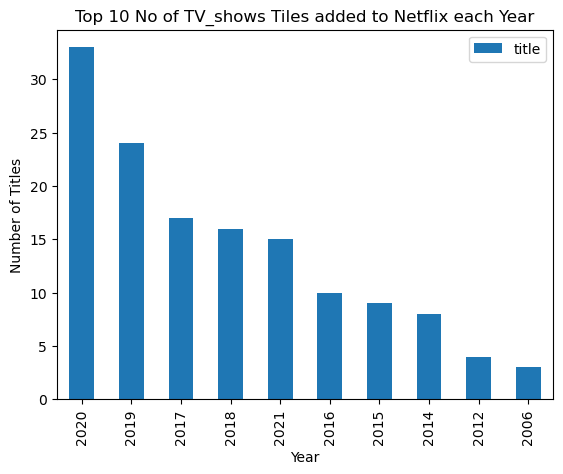

In [261]:
tv_shows = df[df['type'] == 'TV Show'][['title', 'release_year']].groupby(['release_year']).count()
Top_10_Tv_shows = tv_shows.nlargest(10, ['title'])
Top_10_Tv_shows.plot(kind='bar')
plt.title('Top 10 No of TV_shows Tiles added to Netflix each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()



In [262]:
Top_10_Tv_shows

,title
release_year,
2020,33
2019,24
2017,17
2018,16
2021,15
2016,10
2015,9
2014,8
2012,4


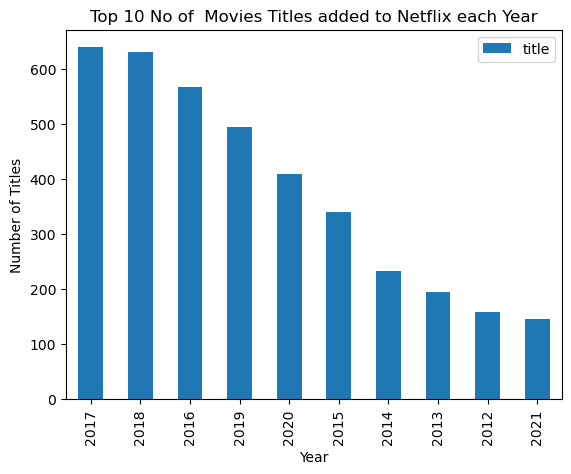

In [260]:
Movie_shows = df[df['type'] == 'Movie'][['title', 'release_year']].groupby(['release_year']).count()
Top_Movies_shows = Movie_shows.nlargest(10, ['title'])
Top_Movies_shows.plot(kind='bar')
plt.title('Top 10 No of  Movies Titles added to Netflix each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

In [263]:
Top_Movies_shows

,title
release_year,
2017,640
2018,632
2016,567
2019,495
2020,409
2015,340
2014,234
2013,195
2012,159


In [281]:
Top_country = df['country'].value_counts().head(10)
Top_country 

country
United States     1846
India              875
United Kingdom     183
Canada             107
Spain               91
Egypt               90
Nigeria             88
Japan               83
Turkey              79
Indonesia           76
Name: count, dtype: int64

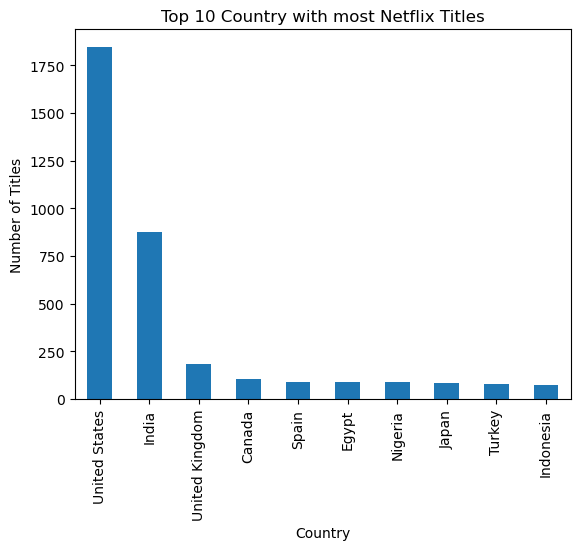

In [282]:
Top_country.plot(kind= 'bar')
plt.title('Top 10 Country with most Netflix Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()


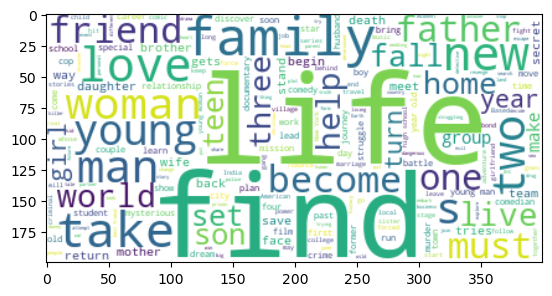

In [284]:
text = " ".join(i for i in df.description)
stopwords = set(STOPWORDS)

word_cloud = WordCloud(stopwords=stopwords,background_color ='white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')

In [285]:
df[['duration_value', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(.*)')
df['duration_value'] = pd.to_numeric(df['duration_value'])

In [286]:
duration_year_tv_shows = df[df['type'] == 'TV Show'][['duration_value','release_year']].groupby(['release_year'])
duration_year_tv_shows.mean()

,duration_value
release_year,
1990,1.000000
2001,1.000000
2006,3.666667
2010,5.000000
2011,1.000000
2012,2.000000
2013,1.000000
2014,1.250000
2015,1.444444


In [287]:
duration_year_Movies=df[df['type'] =='Movie'][['duration_value', 'release_year']].groupby(['release_year'])
duration_year_Movies.mean()

,duration_value
release_year,
1942,18.000000
1944,76.000000
1945,63.000000
1946,58.000000
1947,42.000000
...,...
2017,97.153125
2018,99.063291
2019,97.971717


In [290]:
distribution_rating = df['rating'].value_counts()
distribution_rating

rating
TV-MA       1822
TV-14       1214
R            778
PG-13        470
TV-PG        431
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: count, dtype: int64

(array([5., 3., 0., 0., 1., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([   2.        ,   62.66666667,  123.33333333,  184.        ,
         244.66666667,  305.33333333,  366.        ,  426.66666667,
         487.33333333,  548.        ,  608.66666667,  669.33333333,
         730.        ,  790.66666667,  851.33333333,  912.        ,
         972.66666667, 1033.33333333, 1094.        , 1154.66666667,
        1215.33333333, 1276.        , 1336.66666667, 1397.33333333,
        1458.        , 1518.66666667, 1579.33333333, 1640.        ,
        1700.66666667, 1761.33333333, 1822.        ]),
 <BarContainer object of 30 artists>)

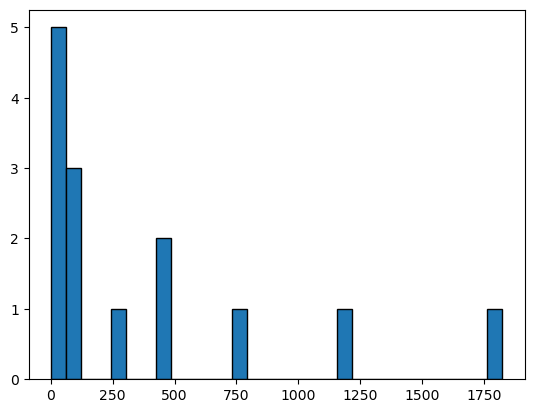

In [293]:
plt.hist(distribution_rating, bins=30, edgecolor = 'black')

In [295]:
df['release_year'].corr(df['year_added'])

0.009800130419615317